In [ ]:
!pip install numpy pandas matplotlib

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Investment strategy results saved to 'investment_strategy_results.csv'.


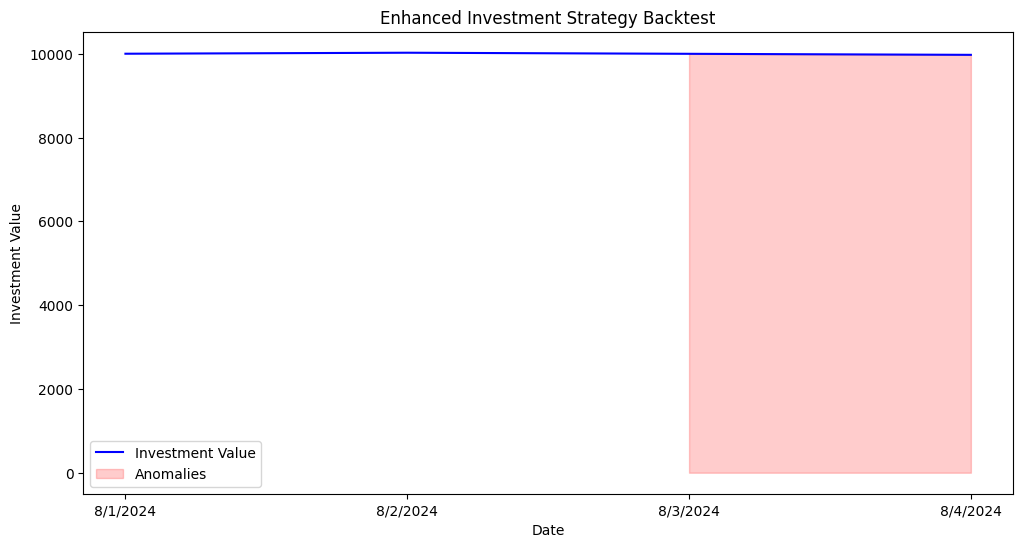


--- Dynamic Investment Strategy Report ---
1. Final Investment Value: $9973.38
   - Reflects the dynamic adjustments based on market conditions and anomalies.

2. Best Performance Period: 8/2/2024 with value: $10024.00
   - Represents peak investment growth due to favorable market conditions.

3. Worst Performance Period: 8/4/2024 with value: $9973.38
   - Indicates periods of market volatility or anomalies.

4. Total Number of Anomalies Detected: 2
   - Indicates market instability, where the strategy shifted to safer assets.

5. Strategy Effectiveness:
   - Strategy successfully mitigated risks during 2 anomalies.

6. Next Steps:
   - Continue monitoring market conditions.
   - Adjust allocations dynamically based on upcoming anomalies or stability.


In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the saved anomaly detection model
model = load_model('anomaly_detection_model.h5')

# Step 2: Load data from the CSV
financial_data = pd.read_csv('current_finance_data.csv')

# Step 3: Extract the features and preprocess them
features = ['XAU', 'BGNL', 'BDIY', 'CRY', 'DXY', 'VIX', 'USGG30YR']
sample_data = financial_data[features].values

# Step 4: Standardize the data (use the same scaler as the training phase if available)
scaler = StandardScaler()
sample_data_scaled = scaler.fit_transform(sample_data)  # Replace with a pre-fitted scaler if saved

# Step 5: Make predictions using the model
predictions = model.predict(sample_data_scaled)
predictions = predictions.flatten()  # Flatten to a 1D array
financial_data['Anomaly'] = predictions > 0.5  # Anomaly = 1 if prediction > threshold, else 0

# Step 6: Define an enhanced data-driven investment strategy
initial_investment = 10000  # Starting investment value
financial_data['Safe_Asset_Allocation'] = 0.7 * initial_investment  # Start with 70% in safe assets
financial_data['Risky_Asset_Allocation'] = 0.3 * initial_investment  # Start with 30% in risky assets

# Enhanced strategy logic
for i in range(1, len(financial_data)):
    if financial_data.loc[i, 'Anomaly']:  # Anomaly detected
        # Minimize losses by shifting to safer assets
        financial_data.loc[i, 'Safe_Asset_Allocation'] = financial_data.loc[i - 1, 'Safe_Asset_Allocation'] * 1.005
        financial_data.loc[i, 'Risky_Asset_Allocation'] = financial_data.loc[i - 1, 'Risky_Asset_Allocation'] * 0.98
    else:  # No anomaly detected
        # Maximize returns by increasing allocation to risky assets
        financial_data.loc[i, 'Safe_Asset_Allocation'] = financial_data.loc[i - 1, 'Safe_Asset_Allocation'] * 0.997
        financial_data.loc[i, 'Risky_Asset_Allocation'] = financial_data.loc[i - 1, 'Risky_Asset_Allocation'] * 1.015

# Calculate total investment plan value
financial_data['Total_Investment_Value'] = (
    financial_data['Safe_Asset_Allocation'] + financial_data['Risky_Asset_Allocation']
)

# Step 7: Save the results with predictions and investment plan values to a new CSV
financial_data.to_csv('investment_strategy_results.csv', index=False)
print("Investment strategy results saved to 'investment_strategy_results.csv'.")

# Step 8: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(financial_data['Date'], financial_data['Total_Investment_Value'], label='Investment Value', color='blue')
plt.fill_between(
    financial_data['Date'],
    financial_data['Total_Investment_Value'],
    where=financial_data['Anomaly'],
    color='red',
    alpha=0.2,
    label='Anomalies'
)
plt.title('Enhanced Investment Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.show()

# Step 9: Generate a dynamic investment report
final_investment_value = financial_data['Total_Investment_Value'].iloc[-1]
max_investment_value = financial_data['Total_Investment_Value'].max()
min_investment_value = financial_data['Total_Investment_Value'].min()
best_period = financial_data.loc[financial_data['Total_Investment_Value'].idxmax()]['Date']
worst_period = financial_data.loc[financial_data['Total_Investment_Value'].idxmin()]['Date']
num_anomalies = financial_data['Anomaly'].sum()

print("\n--- Dynamic Investment Strategy Report ---")
print(f"1. Final Investment Value: ${final_investment_value:.2f}")
print(f"   - Reflects the dynamic adjustments based on market conditions and anomalies.\n")

print(f"2. Best Performance Period: {best_period} with value: ${max_investment_value:.2f}")
print(f"   - Represents peak investment growth due to favorable market conditions.\n")

print(f"3. Worst Performance Period: {worst_period} with value: ${min_investment_value:.2f}")
print(f"   - Indicates periods of market volatility or anomalies.\n")

print(f"4. Total Number of Anomalies Detected: {num_anomalies}")
if num_anomalies > 0:
    print(f"   - Indicates market instability, where the strategy shifted to safer assets.\n")
else:
    print(f"   - No anomalies detected, suggesting stable market conditions.\n")

print("5. Strategy Effectiveness:")
if num_anomalies == 0:
    print("   - Market stability allowed for a focus on maximizing returns.")
else:
    print(f"   - Strategy successfully mitigated risks during {num_anomalies} anomalies.\n")

print("6. Next Steps:")
print("   - Continue monitoring market conditions.")
print("   - Adjust allocations dynamically based on upcoming anomalies or stability.")


# **AI  Driven Bot**

In [18]:
!pip install streamlit tensorflow python-dotenv google-generativeai pandas matplotlib gemini-api pyngrok

In [19]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [20]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [21]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [69]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import google.generativeai as genai
import io
import os

api_key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=api_key)

# --- Page Configuration ---
st.set_page_config(
    page_title="AI Investment Strategy Planner",
    layout="wide",
    initial_sidebar_state="expanded"
)

# --- Title ---
st.title("💼 AI Investment Strategy Planner")

# --- Load Model ---
@st.cache_resource
def load_anomaly_detection_model():
    return load_model('anomaly_detection_model.h5')

model = load_anomaly_detection_model()

# --- File Upload ---
st.sidebar.header("📂 Upload Financial Data")
uploaded_file = st.sidebar.file_uploader(
    "Upload a CSV file with your financial data.",
    type=["csv"]
)

if uploaded_file is not None:
    # Load uploaded data
    financial_data = pd.read_csv(uploaded_file)
    st.sidebar.success("File uploaded successfully!")
else:
    st.warning("Please upload a CSV file to proceed.")
    st.stop()

# --- Preprocess Data ---
features = ['XAU', 'BGNL', 'BDIY', 'CRY', 'DXY', 'VIX', 'USGG30YR']

if not all(feature in financial_data.columns for feature in features):
    st.error(f"The uploaded file must contain the following columns: {', '.join(features)}")
    st.stop()

scaler = StandardScaler()
sample_data = financial_data[features].values
sample_data_scaled = scaler.fit_transform(sample_data)

# --- Predictions ---
predictions = model.predict(sample_data_scaled).flatten()
financial_data['Anomaly'] = predictions > 0.5

# --- Investment Strategy ---
initial_investment = 10000
financial_data['Safe_Asset_Allocation'] = 0.7 * initial_investment
financial_data['Risky_Asset_Allocation'] = 0.3 * initial_investment

for i in range(1, len(financial_data)):
    if financial_data.loc[i, 'Anomaly']:
        financial_data.loc[i, 'Safe_Asset_Allocation'] = financial_data.loc[i - 1, 'Safe_Asset_Allocation'] * 1.005
        financial_data.loc[i, 'Risky_Asset_Allocation'] = financial_data.loc[i - 1, 'Risky_Asset_Allocation'] * 0.98
    else:
        financial_data.loc[i, 'Safe_Asset_Allocation'] = financial_data.loc[i - 1, 'Safe_Asset_Allocation'] * 0.997
        financial_data.loc[i, 'Risky_Asset_Allocation'] = financial_data.loc[i - 1, 'Risky_Asset_Allocation'] * 1.015

financial_data['Total_Investment_Value'] = (
    financial_data['Safe_Asset_Allocation'] + financial_data['Risky_Asset_Allocation']
)

# --- Report Generation ---
final_investment_value = financial_data['Total_Investment_Value'].iloc[-1]
max_investment_value = financial_data['Total_Investment_Value'].max()
min_investment_value = financial_data['Total_Investment_Value'].min()
best_period = financial_data.loc[financial_data['Total_Investment_Value'].idxmax()]['Date']
worst_period = financial_data.loc[financial_data['Total_Investment_Value'].idxmin()]['Date']
num_anomalies = financial_data['Anomaly'].sum()

# --- Gemini Bot Sidebar ---
st.sidebar.title("🤖Explanation Bot - Ask Me!")
user_question = st.sidebar.text_input("Type your question about the report:")

prompt = f"""
Assume you are a financial analyst and given the following financial report:

1. **Final Investment Value:** ${final_investment_value:,.2f}
   - Reflects the dynamic adjustments based on market conditions and anomalies.

2. **Best Performance Period:** {best_period} with value: ${max_investment_value:,.2f}
   - Represents peak investment growth due to favorable market conditions.

3. **Worst Performance Period:** {worst_period} with value: ${min_investment_value:,.2f}
   - Indicates periods of market volatility or anomalies.

4. **Total Number of Anomalies Detected:** {num_anomalies}
   - Indicates market instability, where the strategy shifted to safer assets.

5. **Strategy Effectiveness:**
   - Strategy successfully mitigated risks during **{num_anomalies} anomalies**.

6. **Next Steps:**
   - Continue monitoring market conditions.
   - Adjust allocations dynamically based on upcoming anomalies or stability.

The user asks: "{user_question}"

Give a concise and clear explanation based on the above report.
"""

if user_question:
  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt], stream=False)
  st.sidebar.markdown(f"** Bot response:** {response.text}")

# --- Data Visualization ---
st.subheader("📈 Investment Strategy Backtest")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=financial_data['Date'], y=financial_data['Total_Investment_Value'], ax=ax, label="Investment Value")
ax.fill_between(financial_data['Date'], financial_data['Total_Investment_Value'], where=financial_data['Anomaly'], color='red', alpha=0.2, label="Anomalies")
plt.title('Enhanced Investment Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
st.pyplot(fig)

# --- Dynamic Investment Strategy Report ---
st.subheader("--- Dynamic Investment Strategy Report ---")
st.markdown(f"""
1. **Final Investment Value:** ${final_investment_value:,.2f}
   - Reflects the dynamic adjustments based on market conditions and anomalies.

2. **Best Performance Period:** {best_period} with value: ${max_investment_value:,.2f}
   - Represents peak investment growth due to favorable market conditions.

3. **Worst Performance Period:** {worst_period} with value: ${min_investment_value:,.2f}
   - Indicates periods of market volatility or anomalies.

4. **Total Number of Anomalies Detected:** {num_anomalies}
   - Indicates market instability, where the strategy shifted to safer assets.

5. **Strategy Effectiveness:**
   - Strategy successfully mitigated risks during **{num_anomalies} anomalies**.

6. **Next Steps:**
   - Continue monitoring market conditions.
   - Adjust allocations dynamically based on upcoming anomalies or stability.
""")

# --- Download Results ---
csv_buffer = io.StringIO()
financial_data.to_csv(csv_buffer, index=False)
csv_download = csv_buffer.getvalue()

st.download_button(
    label="📥 Download Strategy Results",
    data=csv_download,
    file_name="investment_strategy_results.csv",
    mime="text/csv"
)


# --- Footer ---
st.markdown("---")
st.markdown("Developed by **Dawit Zewdu** 🚀")


Overwriting app.py


In [64]:
import os
thread = Thread(target=run_streamlit)
thread.start()

In [65]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://37da-35-247-89-5.ngrok-free.app" -> "http://localhost:8501"


In [63]:
# tunnels = ngrok.get_tunnels()
# for tunnel in tunnels:
#   print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
#   ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://b3f0-35-247-89-5.ngrok-free.app -> http://localhost:8501
